# The difference between the Edelweiss resolution function and the true Yield variance

## The problem
We perform the fit to the data using an approximation to the yield variance, not the true yield variance.  This begs the question, "does this impact our answer significantly?"

## What this notebook investigates
This notebook samples the posterior distribution and, for each parameter set sampled, stores the difference between the true yield and the estimate used by the fit.

This notebook focuses on a single energy.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
import h5py
import numpy as np
import pandas as pd

import sys
sys.path.append('../python/')
from EdwRes import *
from prob_dist import *

In [4]:
# get the data
# the posterior distribution is in samples
filename = 'data/edelweiss_corr_C_systematicErrors_sampler_nll_allpars_gausPrior.h5'
f = h5py.File(filename,'r')

# need to store data in an array:
# The sampler will now have a chains attribute 
# which is an array with shape (Nwalker,N,Ndim) 
# where N is the number of interations (500 in our inital run)
# and Ndim is the number of fit parameters
path='{}/{}/'.format('mcmc','sampler')

aH = np.asarray(f[path+'aH'])
C = np.asarray(f[path+'C'])
m = np.asarray(f[path+'m'])
scale = np.asarray(f[path+'scale'])
A = np.asarray(f[path+'A'])
B = np.asarray(f[path+'B'])
samples = np.asarray(f[path+'samples'])

f.close()

# random walks starting near the minimum
ndim, nwalkers = 6, 100

(100, 5000, 6)
(100, 5000)


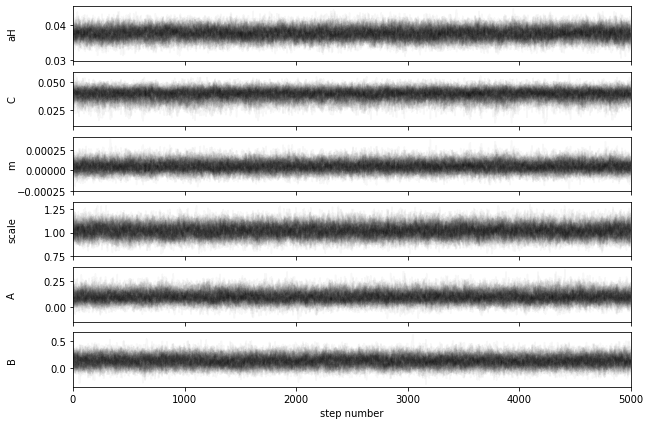

In [5]:
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)

print (np.shape(samples))
print (np.shape(samples[:, :, 1]))
labels = ["aH", "C", "m", "scale", "A", "B"]
for i in range(ndim):
    ax = axes[i]
    # when you pass ax.plot a pair, the columns represent seperate data sets
    ax.plot(np.transpose(samples[:, :, i]), "k", alpha=0.03)
    ax.set_xlim(0, np.shape(samples)[1])
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [6]:
# reshape the samples
samples = samples[:, 300:, :].reshape((-1, ndim))
print(len(samples))

470000


In [10]:
# We'll look at the Er values of the data points
# import data from Edelweiss
resNR_data = pd.read_csv("data/edelweiss_NRwidth_GGA3_data.txt", skiprows=1, \
                       names=['E_recoil', 'sig_NR', 'E_recoil_err', 'sig_NR_err'], \
                       delim_whitespace=True)

# the sorting is necessary!
# otherwise the mask defined below will select the wrong data
resNR_data = resNR_data.sort_values(by='E_recoil')
NR_data = {'Erecoil': resNR_data["E_recoil"][2::], 'sigma': resNR_data["sig_NR"][2::], 'sigma_err': resNR_data["sig_NR_err"][2::]}
Er = np.sort(NR_data['Erecoil'])
Erecoil = Er[0]
print (Er)
print (len(samples))
print(np.random.randint(len(samples), size=10))

for aH, C, m, scale, A, B in samples[np.random.randint(len(samples), size=5)]:
    # GGA3 parameters from Edelweiss tables
    ion_center_0keV = 1.3
    ion_guard_0keV = 1.5
    heat_0keV = 0.4
    ion_122keV = 3.1 
    heat_122keV = 2.7
    par_dict = {'V' : scale*4.0,'eps_eV' : 3.0, 'a': A, 'b': B}
    
    print (aH, C, m, scale, A, B)
    
    """#sigER_func = get_sig_gamma_func(ion_center_0keV, ion_guard_0keV, ion_122keV, heat_0keV, heat_122keV, \
    #                                par_dict, aH)
    
    sigNR_func = get_sig_nuc_func_alt(ion_center_0keV, ion_guard_0keV, ion_122keV, heat_0keV, heat_122keV, \
                                      par_dict, aH, C=0, m=0)
    sig_estimate = sigNR_func(Er)
    
    sig_real = []
    for Er_val in Er:
        sig_real.append(sigmomEdw(Er_val, band='NR', F=0.000001, V=scale*4.0, aH=aH, alpha=(1/100), A=A, B=B))"""

[24.5012 34.2156 44.2627 58.4014 97.7172]
470000
[166844 437543 449249 327395 378575 137607 270509 186667 105656 420553]
0.038389368138011054 0.04204673744663868 3.5366501936747984e-05 1.033455455642827 0.04901057665409447 0.09237074648583721
0.03979912729094979 0.04844712269314805 -3.5988198378863434e-05 0.9153189409697926 -0.026320289070099687 0.23293585036140138
0.03677013024885835 0.03366428322834483 4.5901342746025294e-05 1.01215756990142 0.1851959511806211 0.10689016557567853
0.038218967160844525 0.03541907393594315 5.8187410107272696e-05 1.019020741560056 0.0968657527127207 0.2708840681488174
0.03780084707914204 0.034365655152722226 0.00010689174303258064 1.020511845999075 0.1712096364529889 0.10577729157428738
